In [61]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
import pickle

In [37]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [38]:
df.shape

(10000, 14)

In [39]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
pd.set_option("display.max_columns", None)

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df =df.drop(['RowNumber', 'CustomerId', 'Surname'],  axis=1)
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [43]:
X=df.drop('Exited', axis=1)
y=df['Exited']


In [53]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test =scaler.fit_transform(X_test)

In [54]:
models={
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42)
}

In [57]:
for name, model in models.items():

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"\n{name}:\n")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
  print("Classification report:\n", classification_report(y_test,y_pred))


LogisticRegression:

Accuracy: 0.1985
Confusion Matrix:
 [[   5 1602]
 [   1  392]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.00      0.01      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.51      0.50      0.17      2000
weighted avg       0.71      0.20      0.07      2000


RandomForestClassifier:

Accuracy: 0.597
Confusion Matrix:
 [[1089  518]
 [ 288  105]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1607
           1       0.17      0.27      0.21       393

    accuracy                           0.60      2000
   macro avg       0.48      0.47      0.47      2000
weighted avg       0.67      0.60      0.63      2000


Gradient Boosting:

Accuracy: 0.736
Confusion Matrix:
 [[1436  171]
 [ 357   36]]
Classification report:
               prec

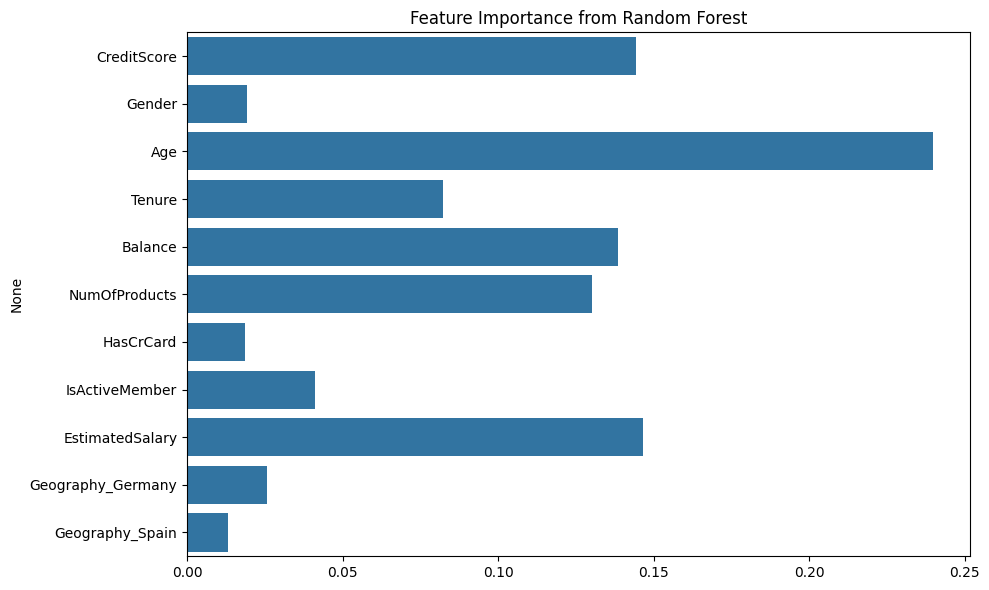

In [59]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

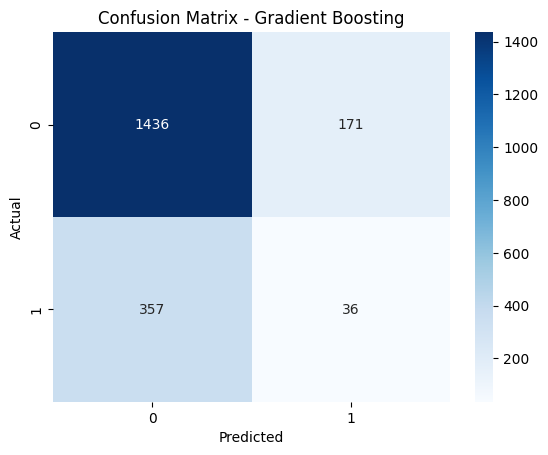

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


y_pred = gb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
